In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

from ssd_data import InputGenerator, preprocess

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
from data_voc import GTUtility
gt_util = GTUtility('data/VOC2007/')
gt_util_train, gt_util_val = gt_util.split(gt_util, split=0.8)

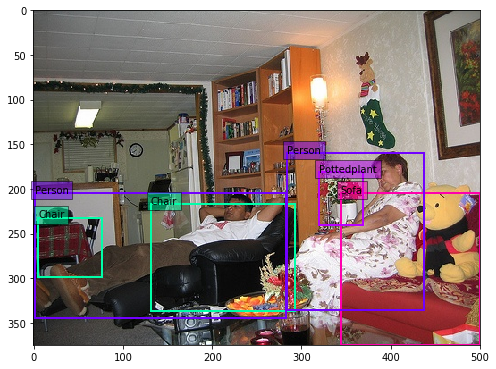

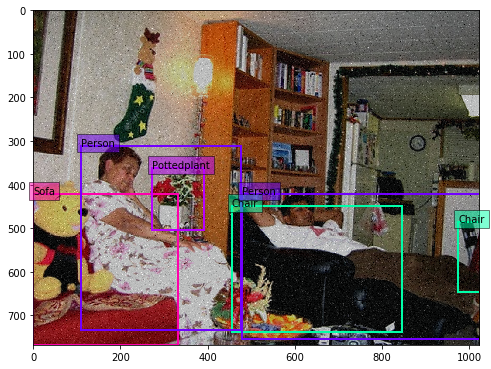

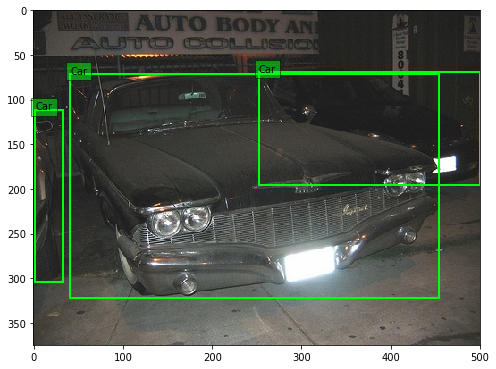

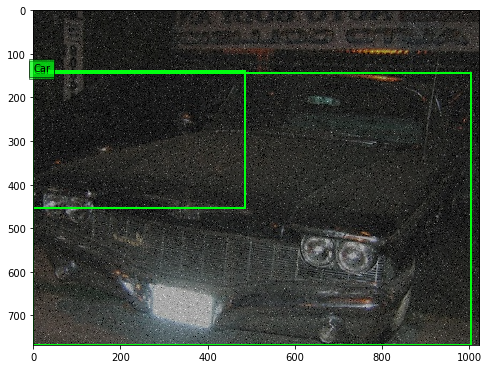

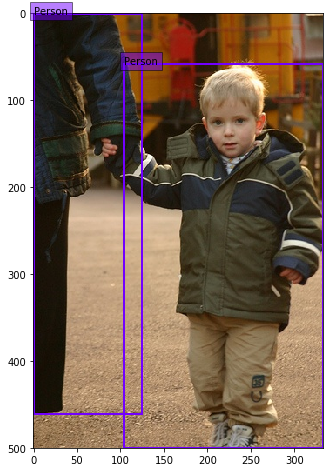

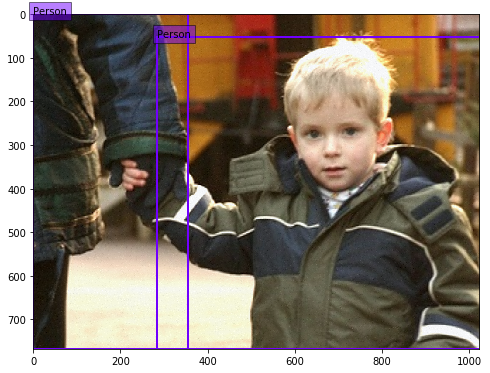

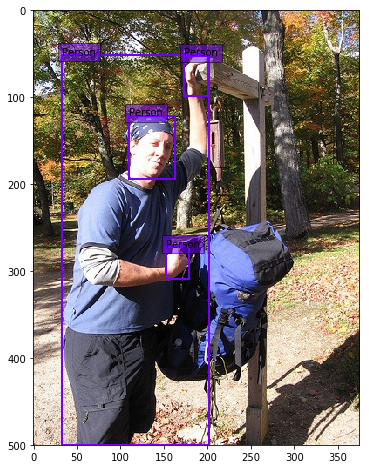

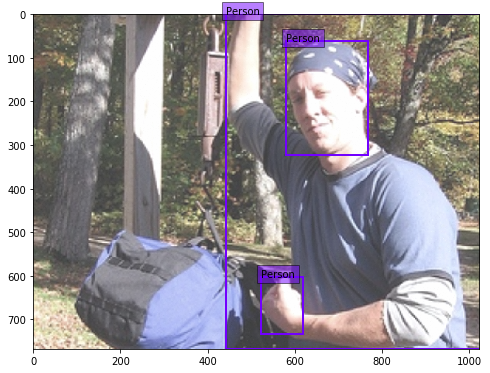

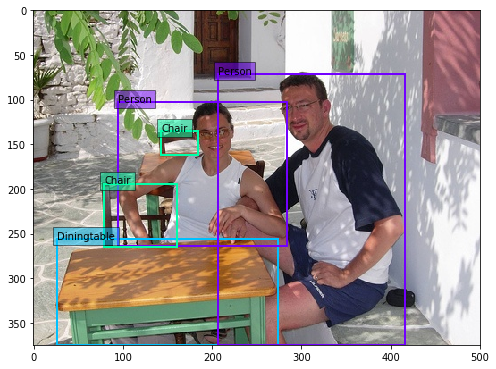

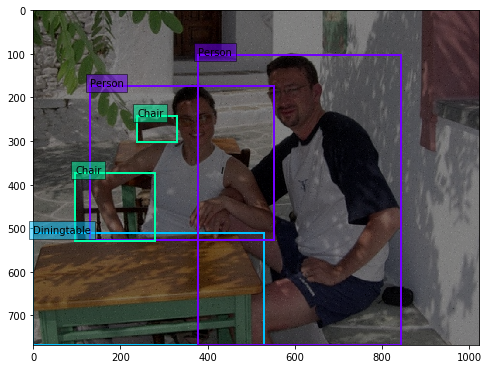

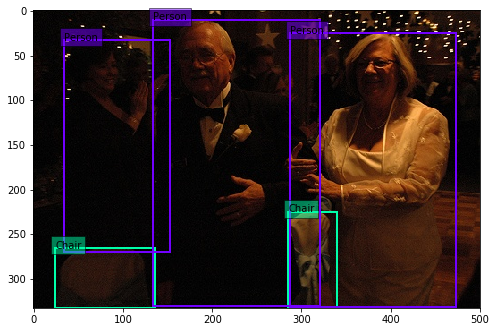

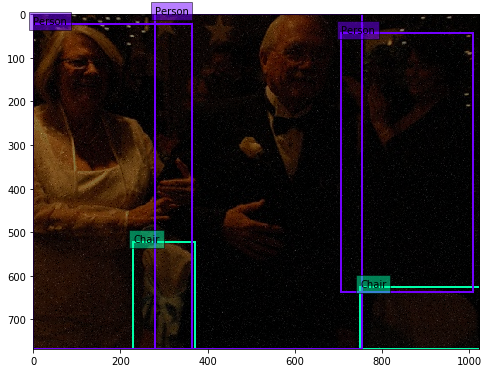

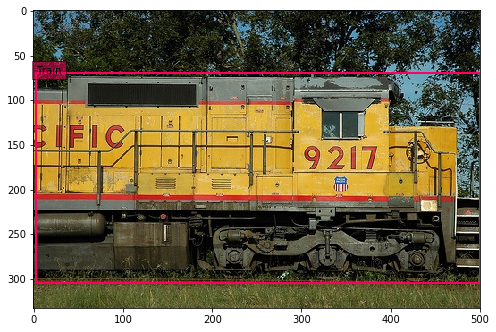

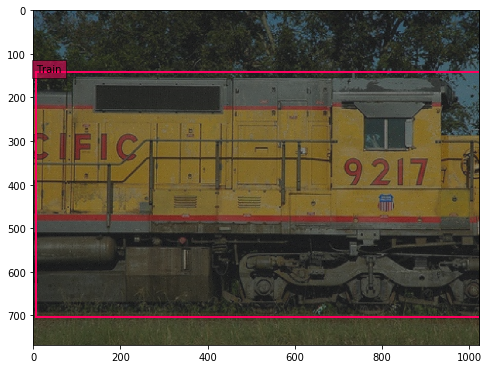

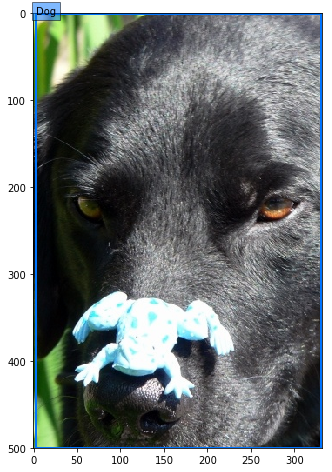

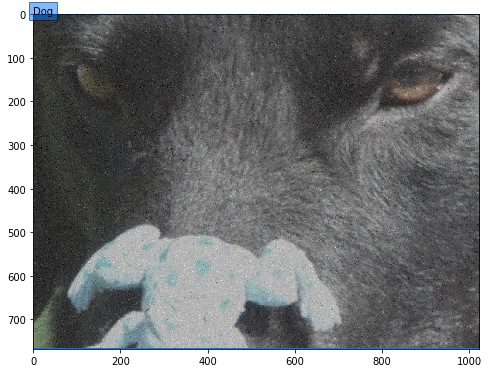

In [3]:
image_size = (768, 1024)
batch_size = 8

class PriorUtilDummy(object):
    def encode(self, gt_data, overlap_threshold=0.5, debug=False):
        return np.zeros((10,10))

gen = InputGenerator(gt_util_train, gt_util_val, PriorUtilDummy(), 
        batch_size, image_size, 
        saturation_var=0.5,
        brightness_var=0.5,
        contrast_var=0.5,
        lighting_std=0.5,
        hflip_prob=0.5,
        vflip_prob=0.0,
        do_crop=True,
        crop_area_range=[0.5, 1.0],
        aspect_ratio_range=[3.9/3, 4.1/3])

g = gen.generate(augmentation=True, debug=True)
batch = next(g)

In [4]:
test_idx = 10

img_name = gt_util.image_names[test_idx]
img_path = os.path.join(gt_util.image_path, img_name)
img = cv2.imread(img_path)
test_input = preprocess(img, image_size)
img = cv2.resize(img, image_size, cv2.INTER_LINEAR).astype('float32')
img = img = cv2.resize(img, image_size, cv2.INTER_LINEAR)
img = img[:, :, (2,1,0)] # BGR to RGB
test_img = img
test_gt = gt_util.data[test_idx]

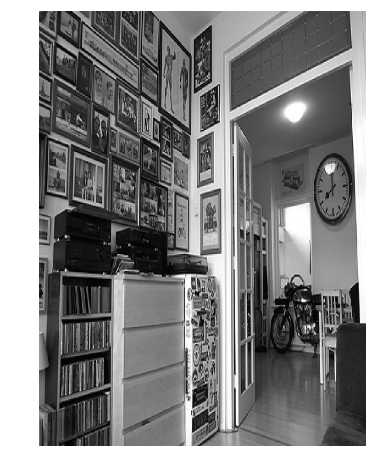

In [5]:
# grayscale
plt.imshow(gen.grayscale(np.copy(test_img))/255, cmap='gray')
plt.axis('off'); plt.show()

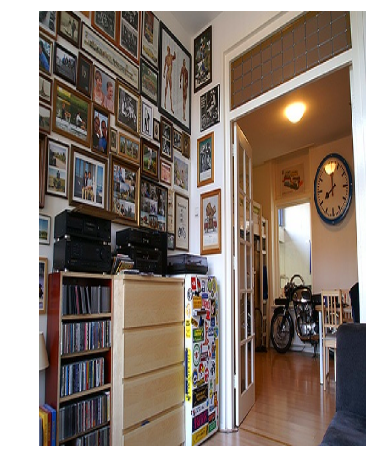

In [6]:
# saturation
plt.imshow(gen.saturation(np.copy(test_img))/255)
plt.axis('off'); plt.show()

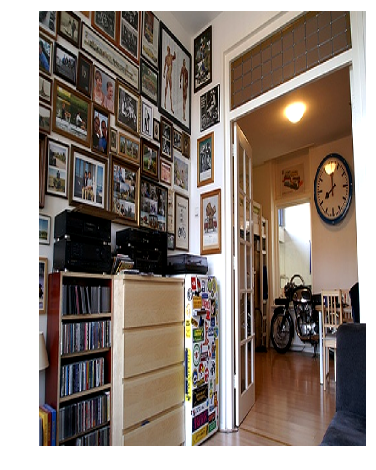

In [7]:
# contrast
plt.imshow(gen.contrast(np.copy(test_img))/255)
plt.axis('off'); plt.show()

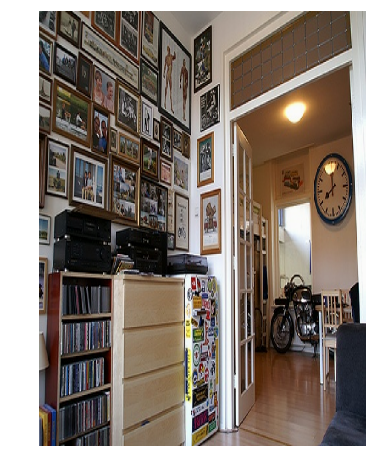

In [8]:
# lighting
plt.imshow(gen.lighting(np.copy(test_img))/255)
plt.axis('off'); plt.show()

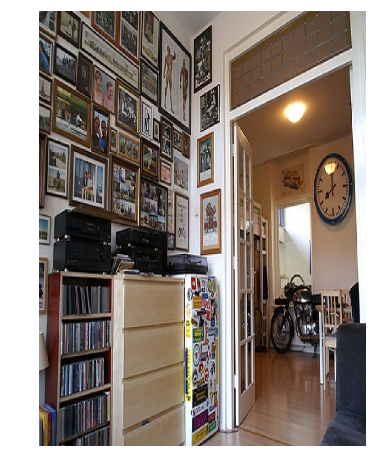

In [9]:
# noise
plt.imshow(gen.noise(np.copy(test_img))/255)
plt.axis('off'); plt.show()

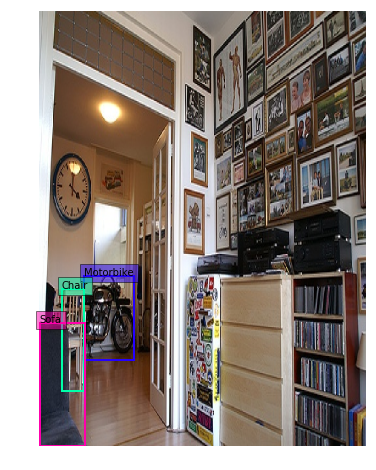

In [10]:
# horizontal_flip
x, y = gen.horizontal_flip(np.copy(test_img), np.copy(test_gt))
plt.imshow(x/255)
gt_util.plot_gt(y)
plt.axis('off'); plt.show()

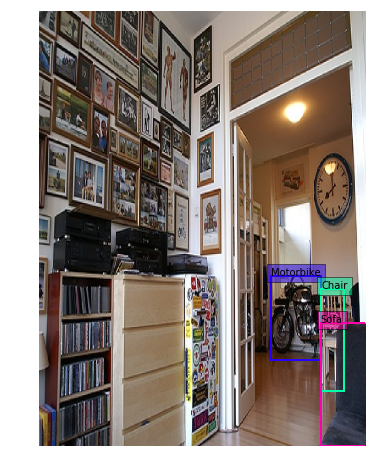

In [11]:
# vertical_flip
x, y = gen.vertical_flip(np.copy(test_img), np.copy(test_gt))
plt.imshow(x/255)
gt_util.plot_gt(y)
plt.axis('off'); plt.show()

(1024, 768, 3) (3, 25)
(538, 701, 3) (3, 25)


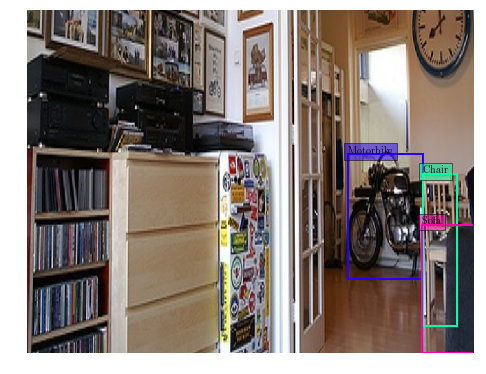

In [40]:
# random_sized_crop
x, y = gen.random_sized_crop(np.copy(test_img), np.copy(test_gt))
print(test_img.shape, test_gt.shape)
print(x.shape, y.shape)
plt.figure(figsize=(8,8))
plt.imshow(x/255)
gt_util.plot_gt(y)
plt.savefig('plots/example.pgf', bbox_inches='tight')
#from matplotlib2tikz import save as tikz_save
#tikz_save('plots/test.tex')
plt.axis('off'); plt.show()